In [39]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [40]:
# Cargamos los datos
df_train = pd.read_csv("/Users/josevillarroel/Desktop/train.csv")
df_test = pd.read_csv("/Users/josevillarroel/Desktop/test-2.csv")

In [30]:
# Hacemos nuestra Exploración inicial
display(df_train.head())
display(df_train.info())
display(df_train.describe())

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

None

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [31]:
# Verificamos los de valores nulos
display(df_train.isnull().sum())

ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
target    0
dtype: int64

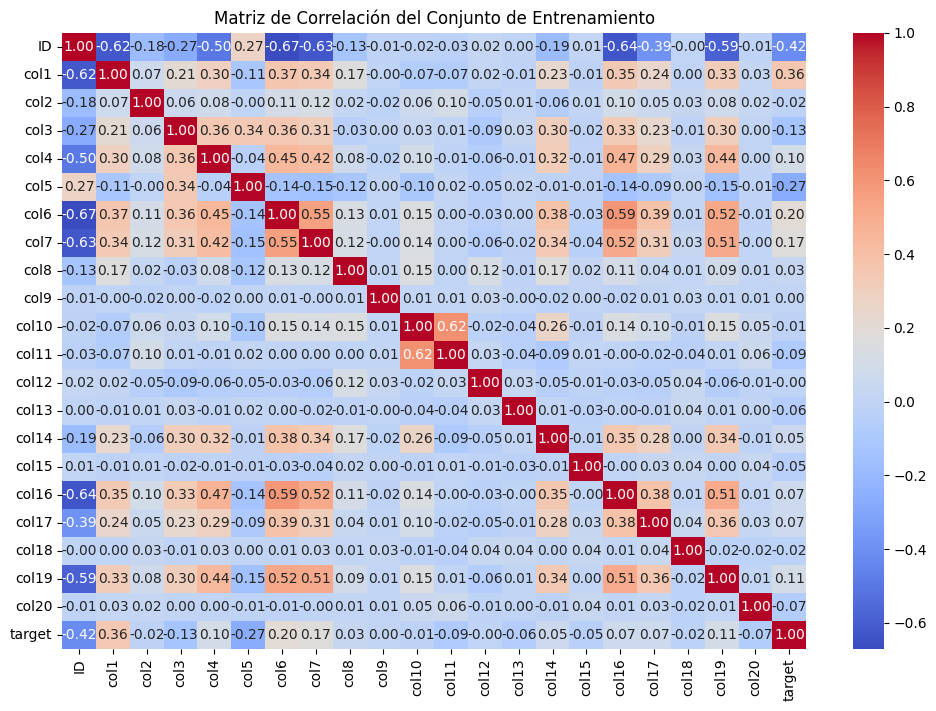

In [41]:
# Realizamos Análisis de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación del Conjunto de Entrenamiento")
plt.show()

In [42]:
# Separamos las variables predictoras y objetivo
features = [col for col in df_train.columns if col != 'target']
X_train = df_train[features]
y_train = df_train['target']
X_test = df_test.copy()  # Se asume que el test no tiene la columna 'target'

In [43]:
# Mostramos Xtrain
X_train

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.009,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.820,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.000,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.004,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,...,0.004,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,...,0.001,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,...,0.007,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,...,0.008,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07


In [50]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Definimos los modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [61]:
# Entrenamos y evaluamos modelos
results = {}
best_model = None
best_auc = 0
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
    
    accuracy = accuracy_score(y_train, y_train_pred)
    roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    cm = confusion_matrix(y_train, y_train_pred)
    report = classification_report(y_train, y_train_pred)
    
    results[name] = {"Accuracy": accuracy, "ROC AUC": roc_auc}
    print(f"Model: {name}")
    print(report)
    print(f"Confusion Matrix:\n{cm}")
    print("-"*50)
    
    if name == "Random Forest":
        best_model = model


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4957
           1       0.84      0.63      0.72       640

    accuracy                           0.94      5597
   macro avg       0.90      0.81      0.84      5597
weighted avg       0.94      0.94      0.94      5597

Confusion Matrix:
[[4882   75]
 [ 239  401]]
--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4957
           1       1.00      1.00      1.00       640

    accuracy                           1.00      5597
   macro avg       1.00      1.00      1.00      5597
weighted avg       1.00      1.00      1.00      5597

Confusion Matrix:
[[4957    0]
 [   0  640]]
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1

In [64]:
# Confirmamos que el mejor modelo es Random Forest
display(results)
print("El mejor modelo seleccionado es: Random Forest")

{'Logistic Regression': {'Accuracy': 0.9438985170627122,
  'ROC AUC': np.float64(0.9336563193463789)},
 'Decision Tree': {'Accuracy': 1.0, 'ROC AUC': np.float64(1.0)},
 'Random Forest': {'Accuracy': 1.0, 'ROC AUC': np.float64(1.0)}}

El mejor modelo seleccionado es: Random Forest


In [63]:
# Realizar predicciones con el modelo Random Forest
y_test_pred = best_model.predict(X_test_scaled)
df_test["target_pred"] = y_test_pred

display(df_test.head())


,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target_pred
0,2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,...,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01,0
1,3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,...,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01,0
2,7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,...,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06,0
3,5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,...,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07,0
4,7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1
